In [8]:
%pylab inline
# 从numpy和matplotlib填充交互式名称空间

Populating the interactive namespace from numpy and matplotlib


## EPS table lookup algo

1. Choose a row from the table.   
   从表中选择一行。
2. With the input, do binary tree search in the row, find the position i where key_table_row[i] < input and key_table_row[i+1] >= input  
   使用输入，在行中执行二叉树搜索，找到位置i，其中 key_table_row[i] < 输入 和 key_table_row [i+1] >= 输入
3. Set output to:  
   将输出设置为：
```
value_table_row[i] + (input - key_table_row[i]) * (value_table_row[i+1] - value_table_row[i]) / (key_table_row[i+1] - key_table_row[i])
```


## CAN 0xe4 torque processing by math and lookup tables (Civic sedan)
## 通过数学和查询表处理CAN 0xe4扭矩（思域轿车）

### Step 1: Mutiplied by sqrt(3)  
### 步骤1：乘以 sqrt(3)
```
can_e4_torque = can_e4_torque * sqrt(3)
```

### Step 2: Scaled down to 1/4 and clamped to [-0x6ee, 0x6ee]  
### 步骤2：按比例缩小至1/4，并固定在[-0x6ee，0x6ee]
```
can_e4_torque = can_e4_torque << 2
can_e4_torque = clamp(can_e4_torque, -0x6ee, 0x6ee)
```

### Step 3: Multiplication using 3 tables (TODO, missing a table data)   
### 步骤3：使用3个表进行乘法 (TODO，缺少表数据)
```
w1 = ?
w2 = ?
v1 = table_1_lookup()
v2 = table_2_lookup()
v3 = w1 * v1 + w2 * v2
v4 = table_3_lookup()
multiplier = v4 * (v3 >> 0xe)
can_e4_torque = multiplier * can_e4_torque
```

### Step 4: Final torque curve  
### 步骤4：最终扭矩曲线

In [9]:
# Input: the abs of can_e4_torque.
# 输入: can_e4_torque的绝对值。
# Output range: see the value_table.
# 输出范围: 请参见value_table。

# started at address 0x1371c

key_table = [
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,
    0x0, 0xDE, 0x14D, 0x1EF, 0x290, 0x377, 0x454, 0x610, 0x6EE,     
    0x0, 0xDE, 0x1BB, 0x299, 0x377, 0x455, 0x532, 0x610, 0x6EE
]

# started at address 0x1379a)
value_table = [
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680, 0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x917, 0xDC5,  0x1017,  0x119F,  0x140B,  0x1680,  0x1680,  0x1680,
  0x0,   0x6B3, 0xB1A,  0xCCD,   0xE9A,   0x104D,  0x119A,  0x11DA,  0x11DA
]



[0, 222, 333, 495, 656, 887, 1108, 1552, 1774] label=Row 0
[0, 222, 333, 495, 656, 887, 1108, 1552, 1774] label=Row 1
[0, 222, 333, 495, 656, 887, 1108, 1552, 1774] label=Row 2
[0, 222, 333, 495, 656, 887, 1108, 1552, 1774] label=Row 3
[0, 222, 333, 495, 656, 887, 1108, 1552, 1774] label=Row 4
[0, 222, 333, 495, 656, 887, 1108, 1552, 1774] label=Row 5
[0, 222, 443, 665, 887, 1109, 1330, 1552, 1774] label=Row 6


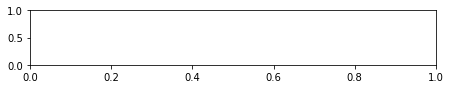

In [38]:
figsize(16,1)
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  print(key_table[i:i+9], 'label=Row %d' % (i//9) )

Text(0.5,1,'Torque Value table')

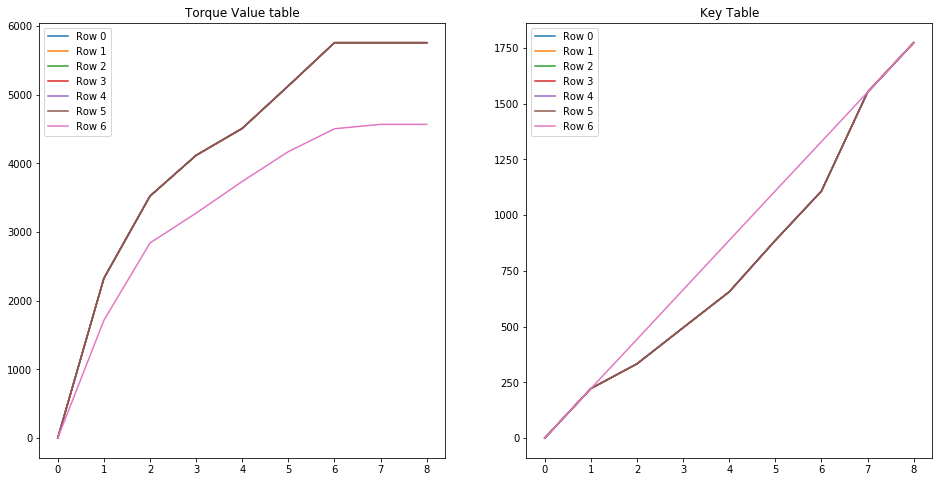

In [40]:
# Matplotlib 的 Legend 图例就是为了帮助我们展示每个数据对应的图像名称，更好的让读者认识到你的数据结构。
figsize(16,8)         # plt.figure(figsize=(a, b))其中figsize用来设置图形的大小，a为图形的宽， b为图形的高，单位为英寸。
plt.subplot(1, 2, 1)  # 1：纵向坐标 是一个图，2：横向坐标 是2个图（像数组一样）, 1：第一个位置显示那个图
for i in range(0, 63, 9):
  plot(key_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()          # 标注部分就是 Legend 图例。
plt.title("Key Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):  # range(从下标0开始，到下标63结束，每次跳跃的间距) 在xxx之间变动
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Torque Value table")


### Table modificiation

Text(0.5, 1.0, 'New table')

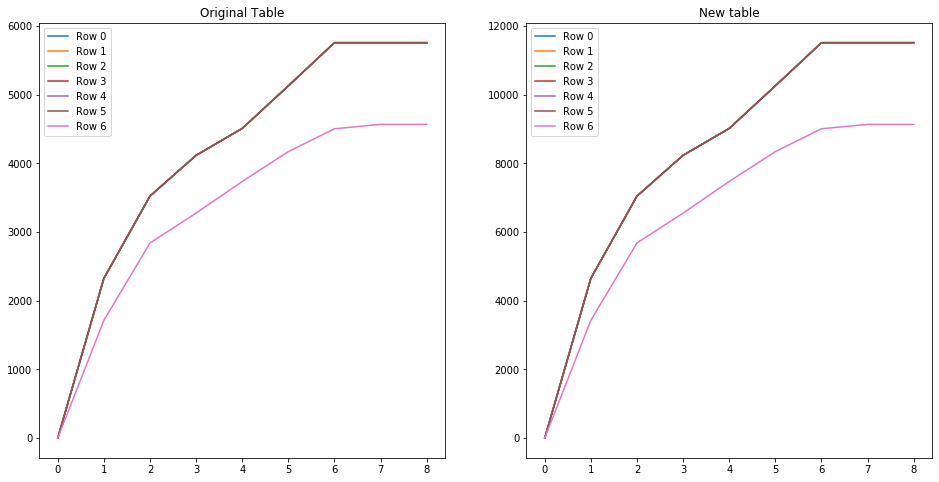

In [20]:
# 2X
modified_value_table = [x * 2 for x in value_table]
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Original Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  plot(modified_value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("New table")


[   0 2327 3525 4119 4511 5131 5760 5760 5760    0 2327 3525 4119 4511
 5131 5760 5760 5760    0 2327 3525 4119 4511 5131 5760 5760 5760    0
 2327 3525 4119 4511 5131 5760 5760 5760    0 2327 3525 4119 4511 5131
 5760 5760 5760    0 2327 3525 4119 4511 5131 5760 5760 5760    0 1715
 2842 3277 3738 4173 4506 4570 4570]


Text(0.5,1,'New table')

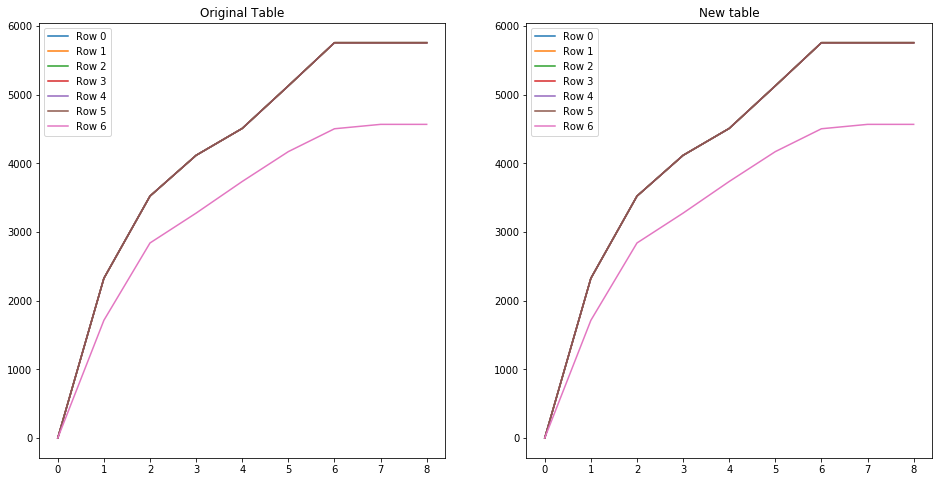

In [52]:
import numpy as np

# Non uniform scale  非均匀比例
scales = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
assert len(scales) == 9, 'Should be 9!!!'

# 每一行放大scales，总共64个元素，最后取整数
new_table = np.array(value_table) * np.tile(scales, 7).astype(int)
print(new_table)
plt.subplot(1, 2, 1)
for i in range(0, 63, 9):
  plot(value_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("Original Table")
plt.subplot(1, 2, 2)
for i in range(0, 63, 9):
  plot(new_table[i:i+9], label='Row %d' % (i//9) )
plt.legend()
plt.title("New table")


In [55]:
import csv

csv_path = '/home/nanami/data/honda_civic_touring_2016_can_stock.csv'

with open(csv_path) as f:
  lines = csv.reader(f, delimiter=',')
  lines = list(lines)
  titles = lines[1]
  print(lines[0])
  # 128:e4
  steering_control_frames = []
  # 0:18f
  steering_status_frames = []
  for l in lines[1:]:
    if int(l[1]) == 0xe4 and int(l[2]) == 128:
      e4_torque = int(l[3][:4], 16)
      if e4_torque > 0x7FFF:
        e4_torque -= 0x10000
      steering_control_frames.append( (float(l[0]), e4_torque,  l[3]) )
    if int(l[1]) == 0x18f and int(l[2]) == 0:
      sensor_val = int(l[3][:4], 16)
      if sensor_val > 0x7FFF:
        sensor_val -= 0x10000
      steering_status_frames.append( (float(l[0]), sensor_val,  l[3]) )
for v in steering_status_frames:
    if v[1] < -1000:
        print(v[1], v[2])
    

['time', 'addr', 'bus', 'data']


TODO: Table lookup code compilation
TODO：表查找代码编译
TODO: EPS emulator
TODO：EPS仿真器